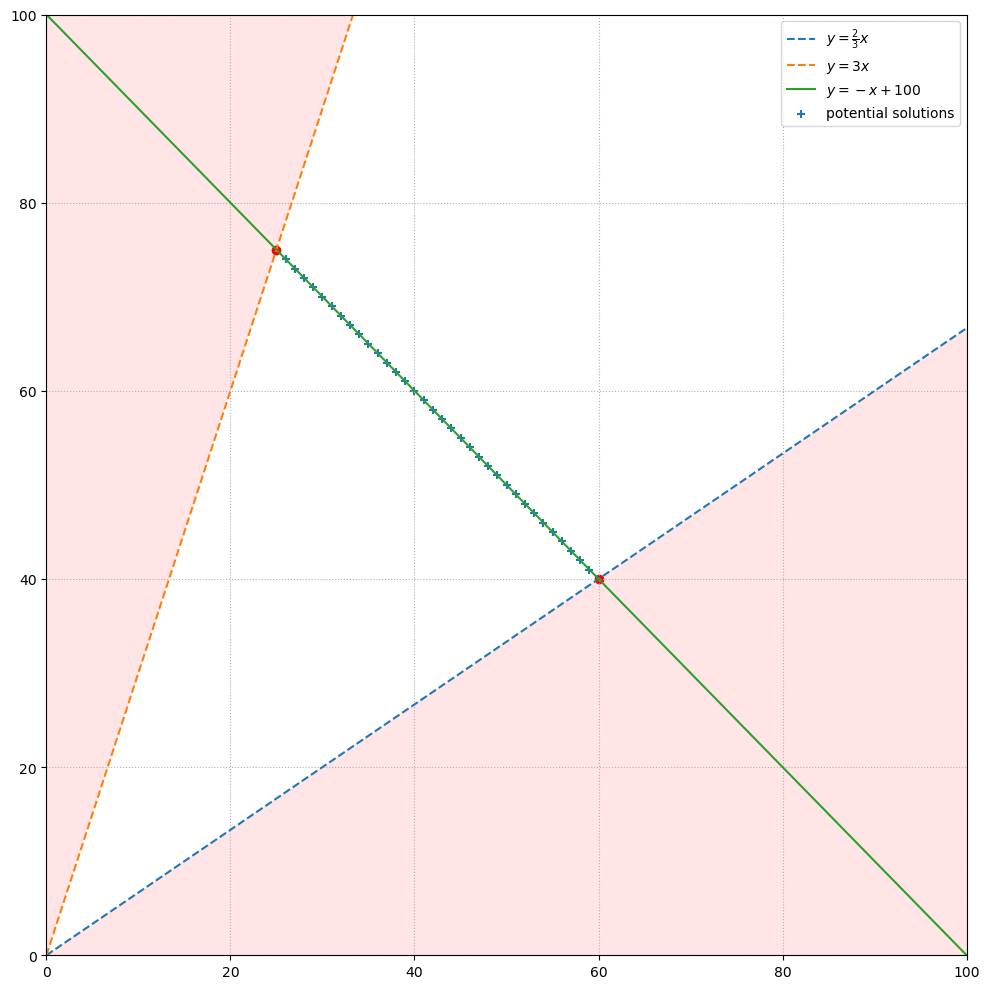

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Two ingredients and their properties given in the example:
# Butterscotch : capacity -1, durability -2, flavor  6, texture  3, calories 8
# Cinnamon     : capacity  2, durability  3, flavor -2, texture -1, calories 3
#
# Cookie dough is made with exactly 100 teaspoons in total, the goal is
# to determine how many of each ingredient. Say x teaspoons of butterscotch
# and y teaspoons of cinnamon, so: x + y = 100, or y = -x + 100
#
# Overall cookie score is the product of the mixture properties, except calories.
# Negative scores are reduced to zero. In this example, the "capacity" property
# of the mixture is given by -x+2y.
#
# For the cookie score to be positive, any property must be greater than zero:
#    -x + 2y > 0
#   -2x + 3y > 0
#    6x - 2y > 0
#    3x -  y > 0
# This reduces to:
#   y > 2/3.x
#   y < 3x

# Transpose so the properties are in rows for multiplication by teaspoon column vectors (x,y)
ingredients = np.array([
    [-1, -2,  6,  3, 8],
    [ 2,  3, -2, -1, 3]
], dtype=np.int64).T

# Limit the number of teaspoons
xmin, xmax = 0, 100
x = np.array([xmin, xmax], dtype=np.int64)

# Intersections of x+y=100 with 3x-y=0 (texture) and -2x+3y=0 (durability)
x0, y0 = np.linalg.solve([[1,1],ingredients[3]], [xmax,0])  # texture
x1, y1 = np.linalg.solve([[1,1],ingredients[1]], [xmax,0])  # durability

# Possible solutions for number of teaspoons x (butterscotch) and y (cinnamon)
xsol = np.arange(x0 + 1, x1, dtype=np.int64)
ysol = -xsol + 100

fig, ax = plt.subplots(figsize=(10,10), tight_layout=True)
ax.set_xlim(x)
ax.set_ylim(x)
ax.grid(linestyle=':')
ax.plot(x, 2*x/3, "--", label=r"$y=\frac{2}{3} x$")
ax.plot(x, 3*x, "--", label="$y=3 x$")
ax.plot(x, -x+xmax, label="$y=-x+100$")
ax.fill([0,33.333,0,0],[0,100,100,0], "r", alpha=0.1)
ax.fill([0,100,100,0],[0,0,66.667,0], "r", alpha=0.1)
ax.scatter([x0,x1], [y0,y1], c="r")
ax.scatter(xsol, ysol, marker="+", label="potential solutions")
plt.legend()
plt.show()

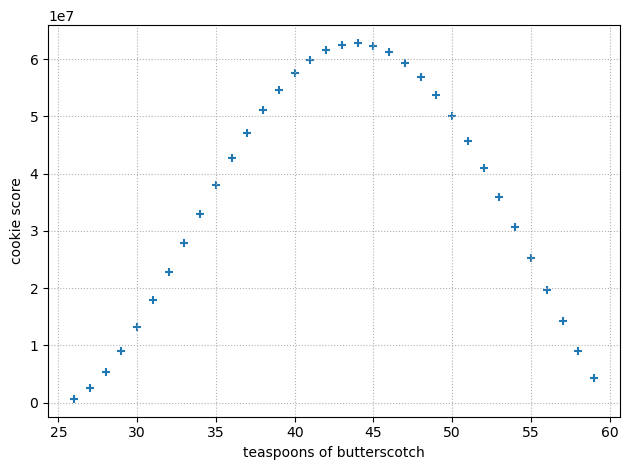

In [2]:
# Teaspoon vectors (x,y) in columns
teaspoons = np.array([xsol, ysol], dtype=np.int64)

# Cookie scores for all possible teaspoon vectors (x,y)
# Take only the first 4 properties for the product (leave off calories).
score = np.prod(np.dot(ingredients, teaspoons)[:4,:], axis=0)

fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel("teaspoons of butterscotch")
ax.set_ylabel("cookie score")
ax.grid(linestyle=':')
ax.scatter(xsol, score, marker="+")
plt.show()

In [3]:
# Find the highest cookie score by starting in the middle of the range of possible
# solutions, then try the best direction ("gradient descent" or ascent in this case).
# Since there is only one independent variable, the directions are simply -1 and +1.

imin = 0
imax = xsol.size - 1
i = xsol.size // 2
while i > imin and score[i - 1] > score[i]:
    i -= 1
while i < imax and score[i + 1] > score[i]:
    i += 1
print("Highest cookie score =", score[i])

Highest cookie score = 62842880


In [4]:
# Part 2: the total calories per cookie must be 500. In the example,
# this means: 8x + 3y = 500. Because the example is a one-dimensional
# problem, this is a direct intersection of a single point:

x2, y2 = np.linalg.solve([[1,1],[8,3]], [100,500])
score2 = score[teaspoons[0,:] == x2]
print("Cookie score for 500 calories =", int(score2))

Cookie score for 500 calories = 57600000


In [5]:
# Real puzzle input, part 1
# Sprinkles    : capacity 2, durability  0, flavor -2, texture  0, calories 3
# Butterscotch : capacity 0, durability  5, flavor -3, texture  0, calories 3
# Chocolate    : capacity 0, durability  0, flavor  5, texture -1, calories 8
# Candy        : capacity 0, durability -1, flavor  0, texture  5, calories 8

properties = np.array([
    [2, 0,-2, 0, 3],
    [0, 5,-3, 0, 3],
    [0, 0, 5,-1, 8],
    [0,-1, 0, 5, 8]
], dtype=np.int32).T

ingredients = properties[:4]

def cookie(ingredients, teaspoons):
    return np.prod(np.dot(ingredients, teaspoons))

def hiscore(ingredients, teaspoons, grad):
    spoon = np.array(teaspoons, dtype=np.int32)
    score = cookie(ingredients, spoon)
    maxscore = score
    maxspoon = spoon
    while True:
        for ds in grad:
            tryspoon = spoon + ds
            tryscore = cookie(ingredients, tryspoon)
            if tryscore > maxscore:
                maxscore = tryscore
                maxspoon = tryspoon
        if maxscore == score:
            return score
        score = maxscore
        spoon = maxspoon
                
grad = np.insert(np.identity(3, dtype=np.int32), 0, -1, axis=1)
for i in range(1, 4):
    grad = np.append(grad, np.insert(np.identity(3, dtype=np.int32), i, -1, axis=1), axis=0)

print("Part 1:", hiscore(ingredients, [25,25,25,25], grad))

Part 1: 21367368


In [6]:
# Real puzzle input, part 2
# 3a+3b+8c+8d=500
#  a+ b+ c+ d=100
# => a+b=60, c+d=40

grad = np.array([
    [-1, 1, 0, 0],
    [ 1,-1, 0, 0],
    [ 0, 0,-1, 1],
    [ 0, 0, 1,-1]
], dtype=np.int32)

print("Part 2:", hiscore(ingredients, [30,30,20,20], grad))

Part 2: 1766400
